In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 765.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=15dd332895fa919512432306df633c24a7bfc120618eae57ac481c4bd8133052
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.1 MB/s eta 0:00:00


In [ ]:
from typing import List, Optional
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

#Sesión 2 Laboratorio de Computación Cuántica 2

##Algoritmo de Deutsch-Jozsa

El algoritmo de Deutsch-Jozsa es un algoritmo Cuántico que esta diseñado para demostrar de forma directa la ventaja cuántica. Antes, Hay que entrar a diversos conceptos relacionados a dicho algoritmo.

###Oráculo

En computación clásica, un oráculo es una ``caja negra'' que aplica una función. Sabemos qué función aplica, pero no cómo la aplica.

Veamos un ejemplo:

Sea
$$
f : \{0,1\}^n \longrightarrow \{0,1\}^m
$$

$$
x \longmapsto x^2
$$

Ejemplo:
$$
f(00101) = 11001
$$

Sabemos qué función aplica, pero no cómo la aplica.



###Oráculo cuántico

En mecánica cuántica, la operación que aplique debe ser una compuerta unitaria, es decir:

$$
U^\dagger U = I
$$

Esto implica que la compuerta tiene que ser reversible. Sin embargo, en general, una función clásica $f$ no es reversible.

###Solución: Oráculo reversible

Creamos un oráculo reversible $U_f$ tal que:

$$
U_f |x\rangle |y\rangle \longrightarrow |x\rangle |y \oplus f(x)\rangle
$$

Donde $\oplus$ equivale a una suma bit a bit, es decir, la operación XOR.

Ejemplo:

$$
|101\rangle \oplus |011\rangle = |110\rangle
$$

Es decir, suma entrada por entrada en binario, equivalente a aplicar una compuerta XOR bit a bit.

####Recordatorio

Si
$$
x = x_1 x_2 x_3 \dots x_n, \quad x_i \in \{0,1\}
$$

Entonces:

$$
|x\rangle = |x_1 x_2 x_3 \dots x_n\rangle
$$



### Función Constante o Balanceada

Supongmos que nos dan una f como la definida anteriormente, y de antemano nos dicen: Esta función puede tener 2 posibilidades

$\bullet$ Ser constante (Todos los valores valgan lo mismo, 0 o 1)

$\bullet$ Ser balanceada (La mitad de los valores valgan 0, la mitad 1)

Y para ello solo nos otorgan un oráculo cuántico que no sabemos cual de los 2 es, solo que puede ser una u otra

###Phase Kickback


El estado

$|-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$

satisface

$X|-\rangle = -|-\rangle$,

es decir, $|-\rangle$ es eigenestado de $X$ con autovalor $-1$.

Para un oráculo

$U_f |x\rangle|y\rangle = |x\rangle |y \oplus f(x)\rangle$,

si ponemos el segundo qubit en $|-\rangle$:

$U_f |x\rangle|-\rangle = |x\rangle |-\oplus f(x)\rangle$.

Entonces:

Si $f(x)=0$:

$|-\oplus 0\rangle = |-\rangle$

Si $f(x)=1$:

$|-\oplus 1\rangle = X|-\rangle = -|-\rangle$

Por lo tanto,

$U_f |x\rangle|-\rangle = (-1)^{f(x)} |x\rangle |-\rangle$.

Tarea 1: Demostrar que, dado un oráculo U_f y su funcionamiento, entonces

$U_f |x\rangle|-\rangle = (-1)^{f(x)} |x\rangle |-\rangle$.

###Circuito de Deutsch-Jozsa




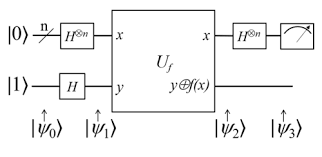




  Dada la notación

$|\psi_0\rangle = |0\rangle^{\otimes n} \otimes |1\rangle$


$|\psi_1\rangle =
\frac{1}{\sqrt{2^n}}
\sum_{x}
|x\rangle \otimes |-\rangle$

Aplicando el oráculo y el Phase kickback:


$|\psi_2\rangle =
\frac{1}{\sqrt{2^n}}
\sum_{x}
(-1)^{f(x)}
|x\rangle \otimes |-\rangle$

$|\psi_3\rangle =
\sum_{z}
\left(
\frac{1}{2^n}
\sum_{x}
(-1)^{f(x)}
(-1)^{x \cdot z}
\right)
|z\rangle
\otimes
|-\rangle$


In [ ]:
def circ_init(n):
  qc = QuantumCircuit(n)
  for qubit in range(n-1):
    qc.h(qubit)
  return qc

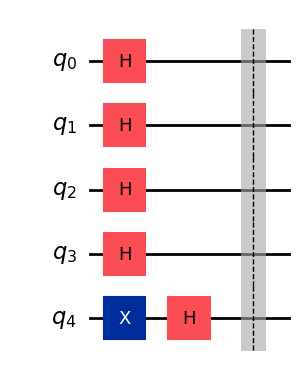

In [ ]:
n=5

dj_circuit = circ_init(n)   #Iniciamos el circuito con Hadamards en el registro inicial
dj_circuit.x(n-1)           #El último qubit lo convertimos en estado |1>
dj_circuit.h(n-1)           #También aplicamos Hadamard aquí
dj_circuit.barrier()
dj_circuit.draw('mpl')

Aquí realizamos la superposición del inicio del algoritmo.

Despues, visualizamos el oráculo que aplicamos. Para explicarlo, usaremos un oráculo constante, que precisamente al aplicar f(x)=1, entonces es equivalente a sin importar que, aplicar la compuerta X en el último qubit

In [ ]:
def const_oracle(n):
  qc = QuantumCircuit(n)
  qc.x(n-1)
  qc.barrier()
  return qc

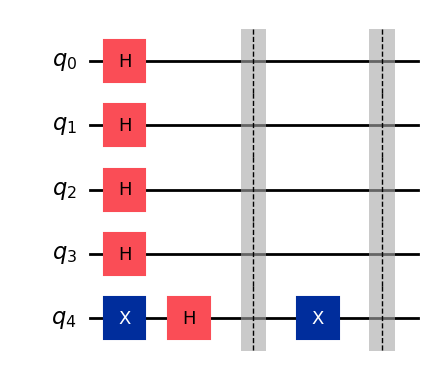

In [ ]:
dj_circuit = dj_circuit.compose(const_oracle(n))
dj_circuit.draw('mpl')

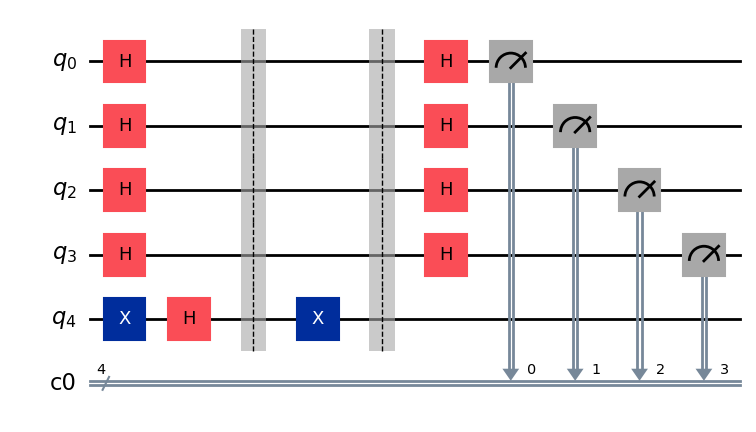

In [ ]:
dj_circuit = dj_circuit.compose(circ_init(n))

dj_circuit.add_register(ClassicalRegister(n-1))

for qubit in range(n-1):
  dj_circuit.measure(qubit,qubit)
dj_circuit.draw('mpl')

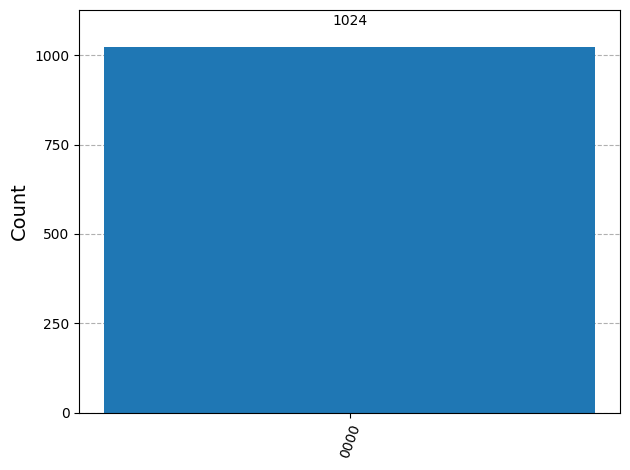

In [ ]:
shots = 1024
counts = backend.run(dj_circuit, shots=shots).result().get_counts()
plot_histogram(counts)

Ejercicio 1: Piensa en como podemos hacer un oráculo balanceado (Pista, la función $f(x_0x_1...x_n)=x_0$ es balanceada)

In [ ]:
def balanced_oracle(n):
    qc = QuantumCircuit(n)

    # control = qubit 0
    # target = ancilla (último qubit)

    return qc


Respuesta:

In [ ]:
def balanced_oracle(n):
    qc = QuantumCircuit(n)

    # control = qubit 0
    # target = ancilla (último qubit)
    qc.cx(3, n-1)

    return qc


Vamos a verificar si nuestro oráculo es balanceado. Recuerda, debes medir un 1 en alguna de las entradas

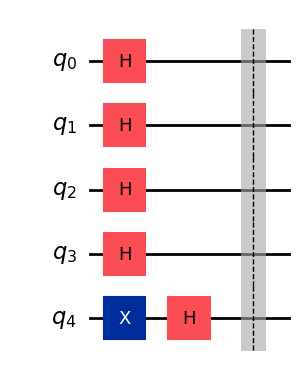

In [ ]:
dj_circuit = circ_init(n)
dj_circuit.x(n-1)
dj_circuit.h(n-1)
dj_circuit.barrier()
dj_circuit.draw('mpl')

Aplicamos el oráculo Balanceado

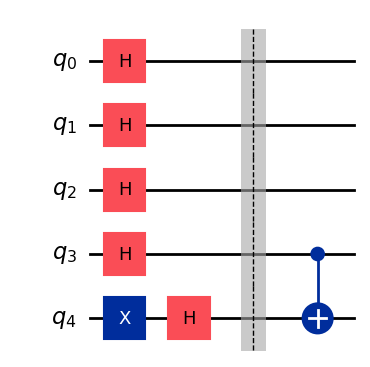

In [ ]:
dj_circuit = dj_circuit.compose(balanced_oracle(n))
dj_circuit.draw('mpl')

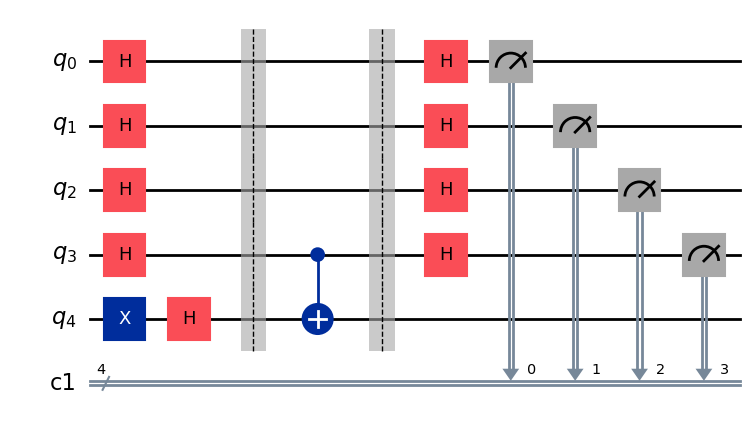

In [ ]:
dj_circuit.barrier()

dj_circuit = dj_circuit.compose(circ_init(n))
dj_circuit.add_register(ClassicalRegister(n-1))

for qubit in range(n-1):
  dj_circuit.measure(qubit,qubit)
dj_circuit.draw('mpl')

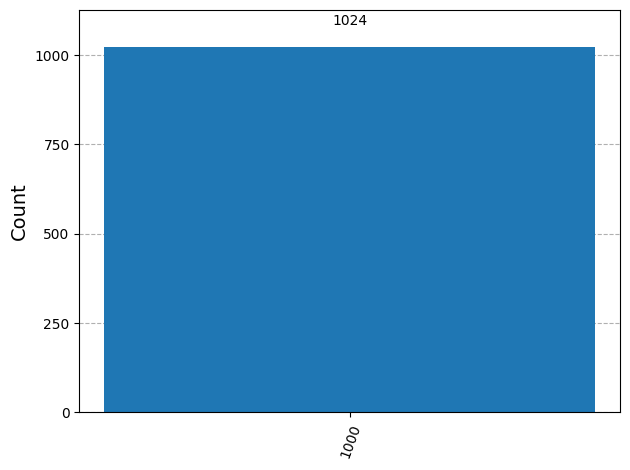

In [ ]:
shots = 1024
counts = backend.run(dj_circuit, shots=shots).result().get_counts()
plot_histogram(counts)

Tarea 2: Quiero que piensen en formas creativas y diferentes de poder aplicar distintos oráculos balanceados. Quiero que piensen en 3 formas que no sean precisamente intuitivas

